In [1]:
#Implement simple classification model on pima insians dataset.

In [2]:
#----Read_dataset_from_csv_file....

In [3]:
import pandas as pd
import pickle
dataset=pd.read_csv('/home/ashok/Downloads/diabetes.csv')


In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset = dataset.drop(columns='DiabetesPedigreeFunction',axis=0)

In [6]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [7]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
dataset.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

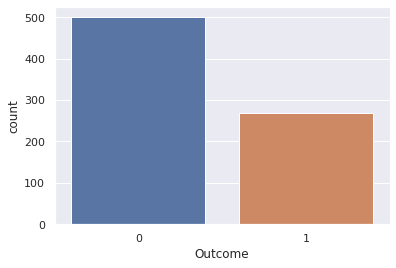

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ax = sns.countplot(x="Outcome", data=dataset)
plt.show()

In [10]:
x=dataset['Age']
y=dataset['Pregnancies']

/home/ashok/Downloads/PREFIX=/home/ashok/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


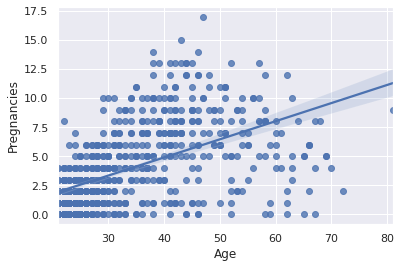

In [11]:
sns.regplot(x,y)
plt.show()

In [12]:
import numpy as np
np.mean(dataset['Age'])

33.240885416666664

In [13]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.238356,1.000000


In [14]:
#-----Implement_preprocessing

In [15]:
#--------------Split_dataset_into_train_data_and_test_data---------

In [16]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [17]:
from sklearn.model_selection import train_test_split
target=dataset['Outcome']
dataset=dataset.drop('Outcome',axis=1)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(dataset,target,test_size=0.20,random_state=42)

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((614, 7), (614,), (154, 7), (154,))

In [20]:
#----Define_model--------

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)

#----Implement_model---------

model.fit(X_train,y_train)
model

RandomForestClassifier(n_estimators=50)

In [21]:
#-----Predict_test_data--------

result=model.predict(X_test)
result

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [22]:
#------Evaluate_model----------


from sklearn.metrics import accuracy_score,classification_report,f1_score

accuracy_score(y_test,result)*100
f1_score(y_test,result)

0.611111111111111

In [23]:
pickle.dump(model, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[6,148,72,35,0.6,33.3,50]]))

[1]
